In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import quandl #Stock market API for fetching Data
from sklearn.linear_model import LinearRegression

In [21]:
data=quandl.get("XNSE/BAJAJ_AUTO", authtoken="hX4MDH7cueKtV5kgsyhz")

In [36]:
data[:10]

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2010-01-01,669.844609,669.844609,669.844609,669.844609,0.0,NaN,NaN
2010-01-04,673.738166,676.772851,658.488399,661.160448,381510.0,NaN,NaN
2010-01-05,667.554280,670.741654,652.743492,664.214219,463938.0,NaN,NaN
2010-01-06,668.012346,668.012346,650.892144,653.945915,465832.0,NaN,NaN
2010-01-07,657.705870,659.996198,639.421418,642.475188,329288.0,NaN,NaN
2010-01-08,642.856910,648.869021,626.042085,631.844249,365802.0,NaN,NaN
2010-01-11,634.802589,641.215508,626.022999,637.302864,404664.0,NaN,NaN
2010-01-12,646.635951,656.121726,639.822225,650.338648,846940.0,NaN,NaN
2010-01-13,658.469313,667.038957,640.547496,651.827361,1135900.0,NaN,NaN


In [24]:
data.iloc[2346]

Open                   2562.958247
High                   2586.359984
Low                    2536.748301
Close                  2546.249406
Volume               406069.000000
Adjustment Factor              NaN
Adjustment Type                NaN
Name: 2018-12-31 00:00:00, dtype: float64

In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
data.isnull()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2010-01-01,False,False,False,False,False,True,True
2010-01-04,False,False,False,False,False,True,True
2010-01-05,False,False,False,False,False,True,True
2010-01-06,False,False,False,False,False,True,True
2010-01-07,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...
2018-12-25,False,False,False,False,False,True,True
2018-12-26,False,False,False,False,False,True,True
2018-12-27,False,False,False,False,False,True,True


In [30]:
data.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Adjustment Factor    2336
Adjustment Type      2336
dtype: int64

In [35]:
data["Adjustment Factor"].mean()

0.936224

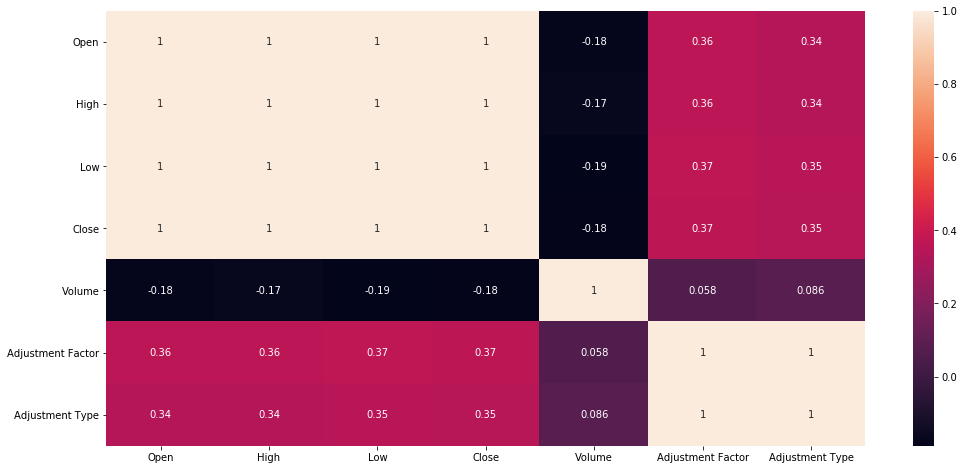

In [32]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)
#Compute pairwise correlation of columns

In [66]:
x = (data.loc[:,'Open':"Low"])
y = data.loc[:,'Close']

In [67]:
x.head()


,Open,High,Low
Date,,,
2010-01-01,669.844609,669.844609,669.844609
2010-01-04,673.738166,676.772851,658.488399
2010-01-05,667.554280,670.741654,652.743492
2010-01-06,668.012346,668.012346,650.892144
2010-01-07,657.705870,659.996198,639.421418


In [68]:
y.head()


Date
2010-01-01    669.844609
2010-01-04    661.160448
2010-01-05    664.214219
2010-01-06    653.945915
2010-01-07    642.475188
Name: Close, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [70]:
LR = LinearRegression()


In [71]:
LR.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
LR.score(x_test,y_test)

0.9997289979686543

In [79]:
test_data=[[2950.00,3000.00,2925.00]]
prediction = LR.predict(test_data)

In [80]:
print(prediction)
#17 July 2020
# 17 July 2020 Open : 2950.00 High : 3000.00 Low 2925.00 Close: 2995.00 Volume 687105

[2968.61682553]


In [77]:
test_data1=[[3011.00,3030.15,2906.55]]
prediction1 = LR.predict(test_data1)

In [78]:
print(prediction1)
#22 July 2020 Open : 3011.00 High : 3030.15 Low 2906.55 Close: 2985.40 Volume 2050820

[2942.90716049]


In [83]:
test_data2=[[2569.00,2570.00,2515.20]]
prediction2 = LR.predict(test_data2)
#25 Mar 2020 Open : 1917.00 High : 1989.00 Low 1866.60 Close: 1946.75 Volume 606235
#3 Feb 2020 Open : 2569.00 High : 2570.00 Low 2515.20 Close: 2523.85 Volume 602971

In [84]:
print(prediction2)

[2527.00077336]


In [90]:
start=float(input())
high=float(input())
low=float(input())

3011.00
3030.15
2906.55


In [94]:
test_data3=[[start,high,low]]
prediction3 = LR.predict(test_data3)

In [95]:
print(prediction3)
#22 July 2020

[2942.90716049]


In [96]:
if(prediction3<start):
    print("SELL")
elif(prediction3>start):
    print("BUY")
else:
    print("See other news and factors")

SELL
